*© copyright information: *<br>
*Modified from:*<br>
*- towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0* <br> 
*- faculty.cc.gatech.edu/~bboots3/CS4641-Fall2018/Lecture2/02_DecisionTrees.pdf*<br>
*- towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052*<br>
*Notebook for course: Data Sciences for Energy-Efficient Design 2022 SoSe in Leibniz Universität Hannover* <br>
*MIT license*

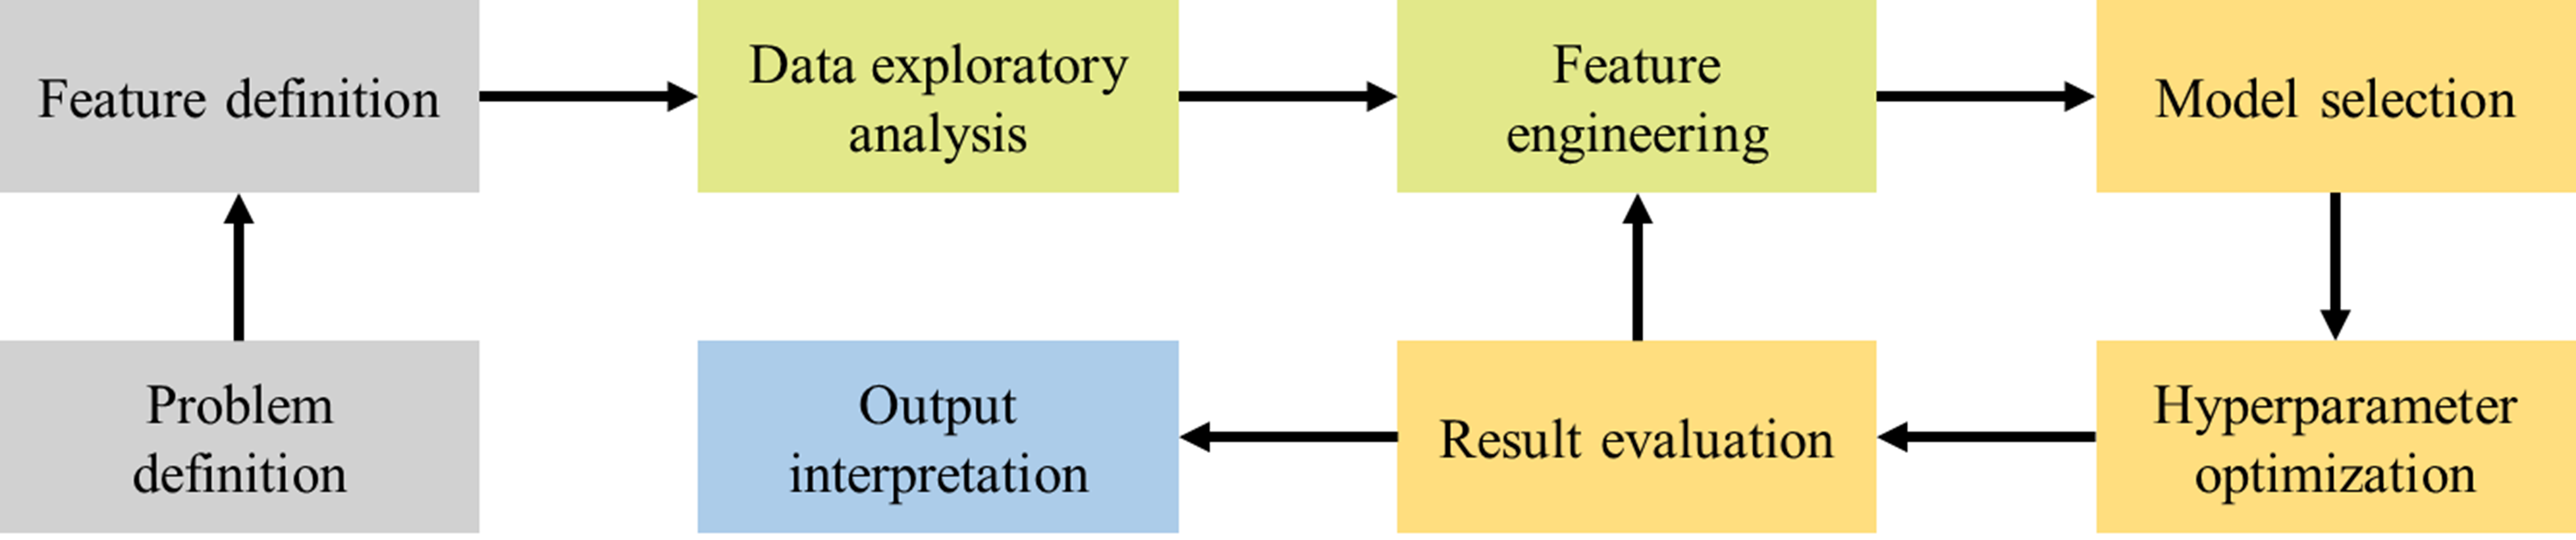

Classification/Regression is a two-step process, **learning step** and **prediction step**, in machine learning. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. 

**Dataset:** [California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)<br>

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the sample data
from sklearn.datasets import fetch_california_housing

# Get data
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target 

# Make DataFrame
data = pd.DataFrame(X, columns=dataset.feature_names)
data[dataset.target_names] = y

In [17]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)

SVMs or **Support Vector Machines** are one of the most popular and widely used algorithm for dealing with classification problems in machine learning.

In machine learning, Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for **classification** and **regression** analysis. <Br>
In Support Vector Regression, the straight line that is required to fit the data is referred to as **hyperplane**.

The objective of a support vector machine algorithm is to find a hyperplane in an n-dimensional space that distinctly classifies the data points. <Br>
The data points on either side of the hyperplane that are closest to the hyperplane are called **Support Vectors**.

![ChessUrl](https://miro.medium.com/max/1400/1*Gr72C6I-u0ZWdgBxI47JBw.gif "chess")

### Hyperparameters in SVM

**Kernel**<br>
A kernel is a set of mathematical functions that takes data as input and transform it into the required form. These are generally **used for finding a hyperplane** in the higher dimensional space.

The most widely used kernels include **Linear, Non-Linear, Polynomial, Radial Basis Function (RBF)** and **Sigmoid**. By default, RBF is used as the kernel. Each of these kernels are used depending on the dataset.

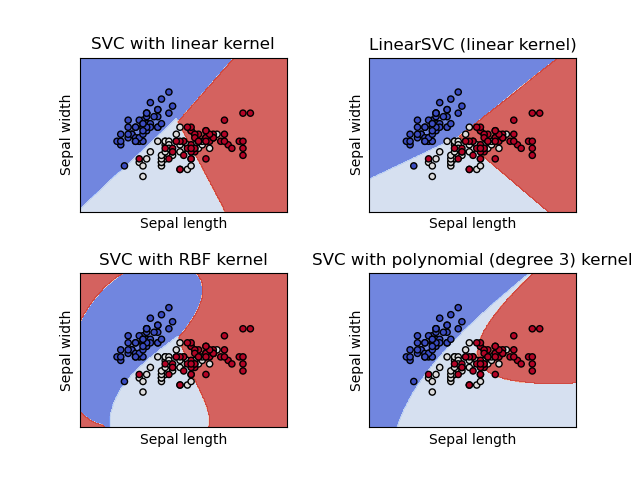

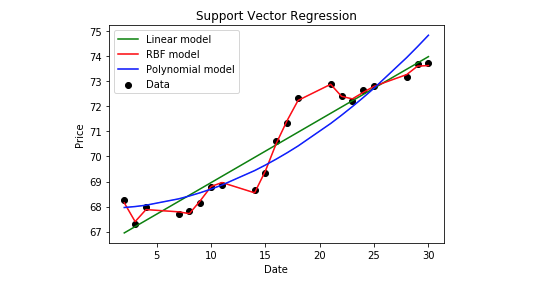

**Boundary Lines**<br>
These are the two lines that are drawn around the hyperplane at a distance of **ε (epsilon)**. It is used to create a margin between the data points.

**Example:** [SVR (Support Vector Regression)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
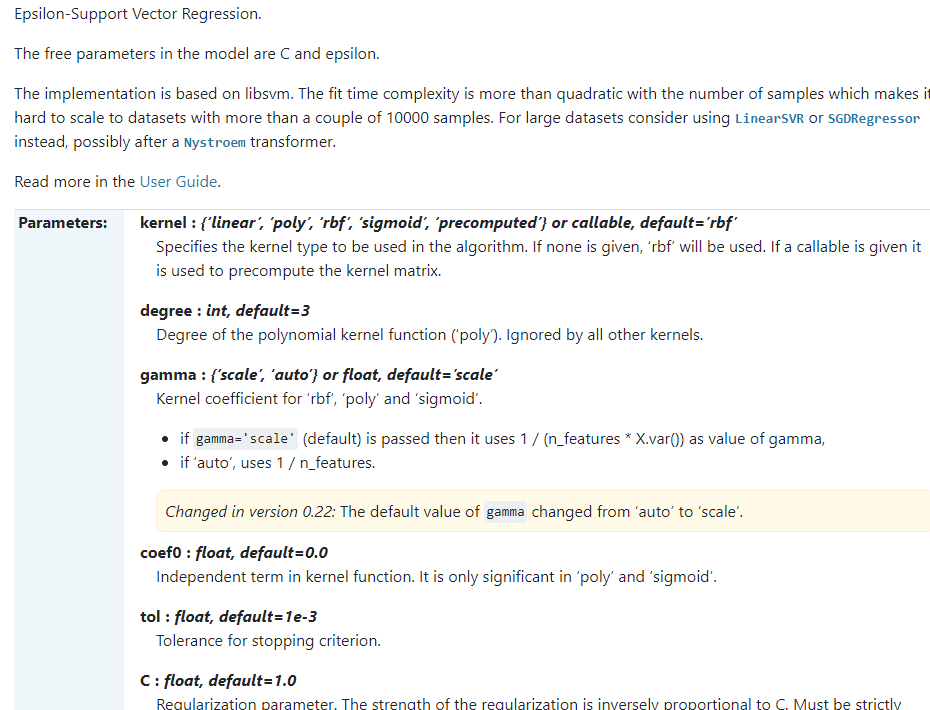


Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line. The fit time complexity of SVR is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

For large datasets, **Linear SVR** or **SGD Regressor** is used. Linear SVR provides a faster implementation than SGD but only considers the linear kernel. The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

In [2]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Define model and fit
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

In [4]:
X_train.shape, X_test.shape

((18576, 8), (2064, 8))

In [3]:
# Prediction and evaluation
y_pred = regressor.predict(X_test)

print('The prediction accuracy is:',mean_absolute_percentage_error(y_pred, y_test))

The prediction accuracy is: 0.48412806043792606


### Advantages of SVM
- It is **robust to outliers**.
- Decision model can be easily updated.
- It has excellent generalization capability, with high prediction accuracy.
- Its **implementation is easy**.

### Disadvantages of SVM
- They are **not suitable for large datasets**.
- In cases where the **number of features for each data point exceeds the number of training data samples, the SVM will underperform**.
- The Decision model does not perform very well when the data set has more noise i.e. target classes are overlapping..

## [Decision tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

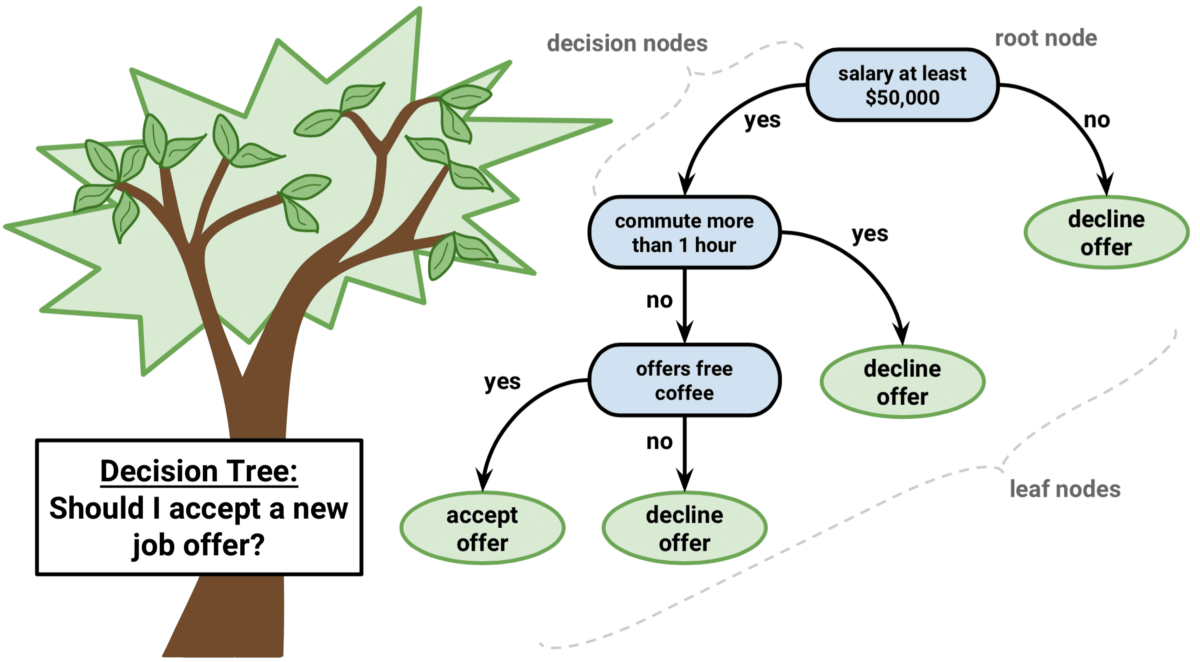

Decision Tree algorithm belongs to the family of supervised learning algorithms. The decision tree algorithm can be used for solving **regression** and **classification problems** by learning simple **decision rules**:<br>
- 1. **Categorical Variable Decision Tree**: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
- 2. **Continuous Variable Decision Tree**: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

The decision tree calculates how much **accuracy** each split will cost us, using a function. <br>
The split that costs least is chosen. This algorithm is recursive in nature as the groups formed can be sub-divided using same strategy. Due to this procedure, this algorithm is also known as the **greedy algorithm**.<br>
The root node or first test attribute is selected based on a statistical measure called **information gain**.

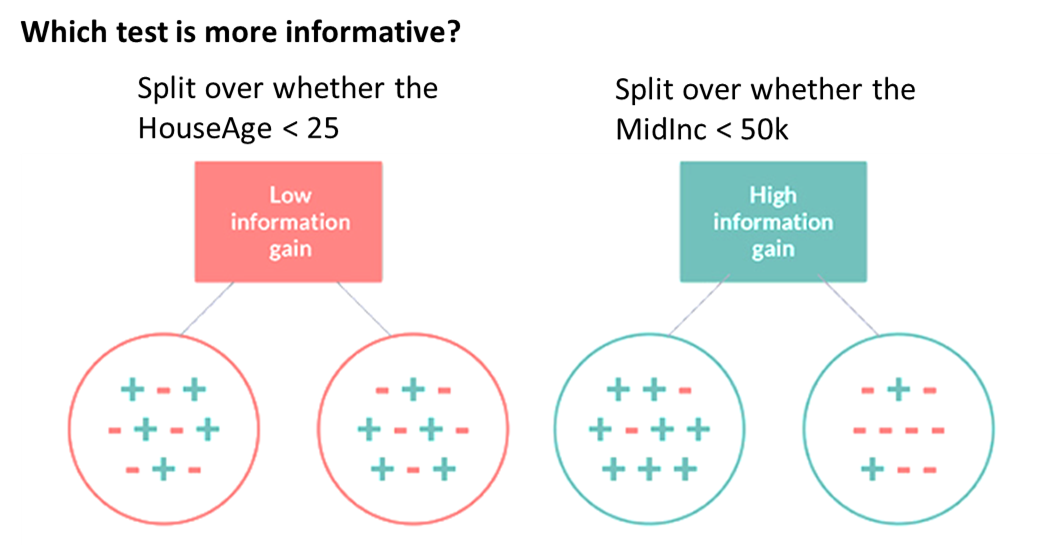

The gain/cost of split:<br>
**Regression :** ``sum(y — prediction)²``<br>
Lets say, we are predicting the price of houses. Now the decision tree will start splitting by considering each feature in training data. The mean of responses of the training data inputs of particular group is considered as prediction for that group. **The split with lowest cost is chosen**<br>

**Classification :** ``G = sum(pk * (1 — pk))``
A Gini score gives an idea of how good a split is by how mixed the response classes are in the groups created by the split. Here, **pk is proportion of same class inputs present in a particular group**. A perfect class purity occurs when a group contains all inputs from the same class, in which case pk is either 1 or 0 and G = 0, where as a node having a 50–50 split of classes in a group has the worst purity, so for a binary classification it will have pk = 0.5 and G = 0.5.

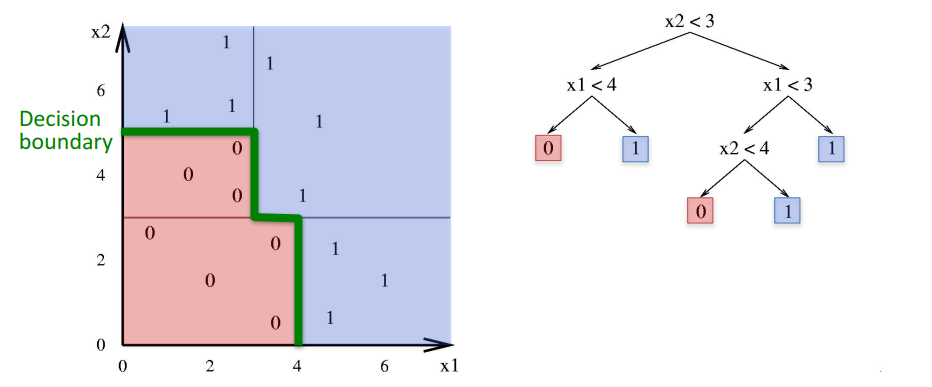

### Important Terminology related to Decision Trees
- 1. **Root Node**: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
- 2. **Splitting**: It is a process of dividing a node into two or more sub-nodes.
- 3. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
- 4. **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- 5. **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- 6. **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.
- 7. **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

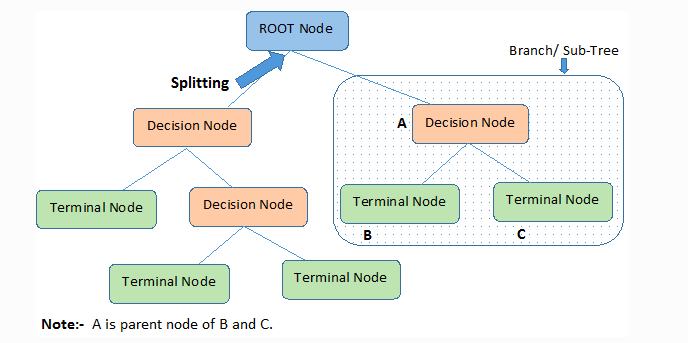

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_3 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [6]:
# Prediction and evaluation
y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)
y_pred_3 = regr_3.predict(X_test)

print('The prediction accuracy in Decision tree (1) is:',mean_absolute_percentage_error(y_pred_1, y_test))
print('The prediction accuracy in Decision tree (3) is:',mean_absolute_percentage_error(y_pred_2, y_test))
print('The prediction accuracy in Decision tree (5) is:',mean_absolute_percentage_error(y_pred_3, y_test))

The prediction accuracy in Decision tree (1) is: 0.38248534345266777
The prediction accuracy in Decision tree (3) is: 0.31655622412256834
The prediction accuracy in Decision tree (5) is: 0.2808754694934938


In [13]:
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

array([[<AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

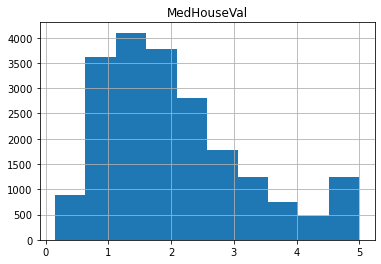

In [14]:
data[['MedHouseVal']].hist()

In [16]:
data['MedHouseVal'].mean()

2.0685581690891843

[Text(0.5, 0.75, 'MedInc <= 5.045\nsquared_error = 1.327\nsamples = 18576\nvalue = 2.07'),
 Text(0.25, 0.25, 'squared_error = 0.834\nsamples = 14653\nvalue = 1.737'),
 Text(0.75, 0.25, 'squared_error = 1.21\nsamples = 3923\nvalue = 3.312')]

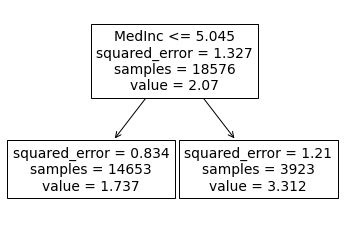

In [58]:
from sklearn import tree
tree.plot_tree(regr_1, feature_names = dataset.feature_names)

*For better tree visualization, we recommend [dtreeviz](https://github.com/parrt/dtreeviz)*

### Advantages of Decision tree

- **Simple to understand, interpret, visualize**.
- Decision trees **implicitly perform variable screening or feature selection**.
- Can handle both numerical and categorical data. Can also **handle multi-output problems**.
- Decision trees require relatively **little effort from users for data preparation**.
- **Nonlinear relationships between parameters do not affect tree performance**.

### Disadvantages of Decision tree

- Decision-tree learners can create **over-complex** trees that do not generalize the data well. This is called overfitting.
- Decision trees can be unstable because **small variations in the data might result in a completely different tree being generated**. This is called variance, which needs to be lowered by methods like bagging and boosting.
- **Greedy algorithms cannot guarantee to return the globally optimal decision tree**. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
- Decision tree learners **create biased trees if some classes dominate**. It is therefore recommended to balance the data set prior to fitting with the decision tree.

## Random forest
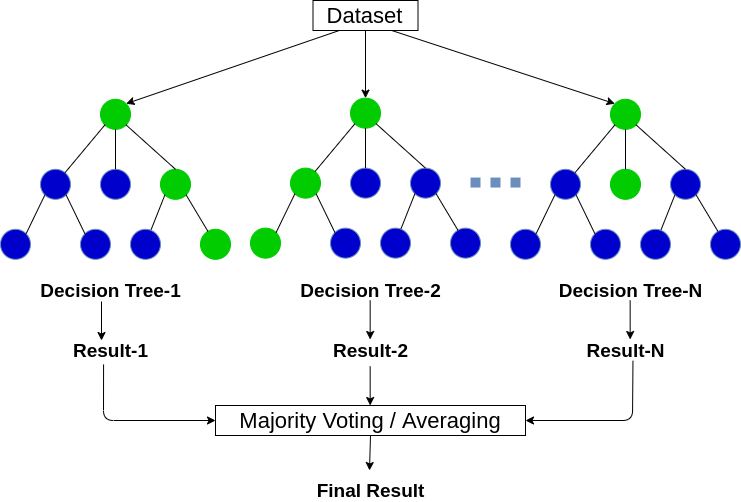

## [Different metrics in Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#:~:text=Metric%20functions%3A%20The%20sklearn.,Regression%20metrics%20and%20Clustering%20metrics)
For suggestion:<br>
**Regression:** Root mean squared error, mean aboslute percentage error<br>
**Classification:** Accuracy, roc_auc, f1<br><br>
https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics


## A roadmap for choosing right algorithm
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

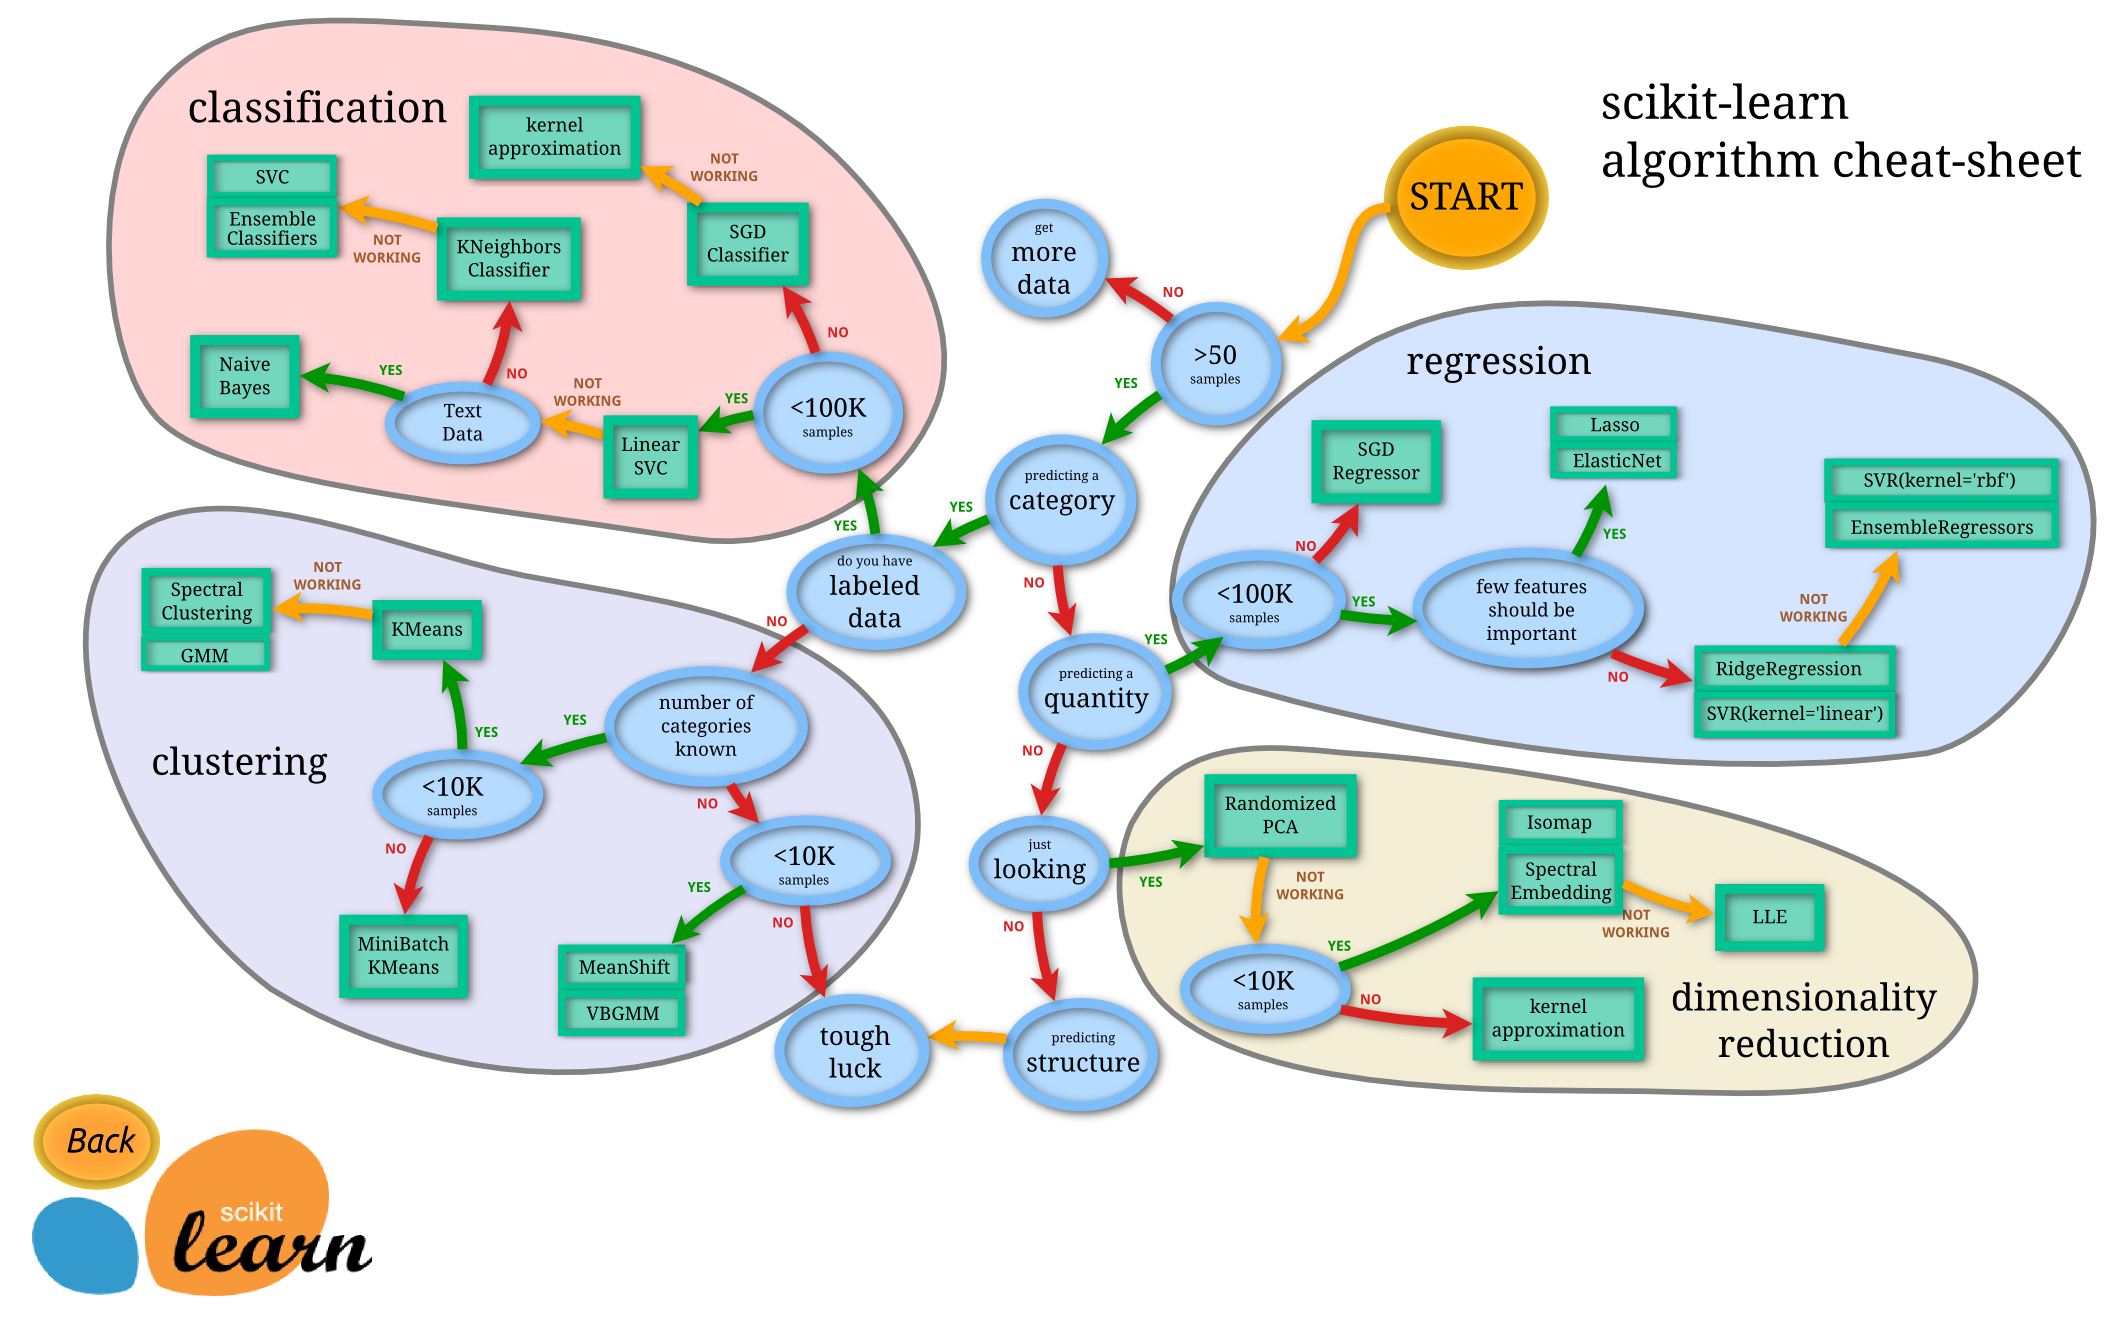

The ``MinMaxScaler``, ``StandardScaler``, ``RobustScaler`` e ``Normalizer`` are sklearn models and follows the same API convention that we have seen in the supervised section. This means you can use ``fit()`` and ``transform()`` for preparing the model and then scale the data.

## Intepretation

**Feature Importance is extremely useful for the following reasons:**<br>

**1) Data Understanding.**<br>
- Building a model is one thing, but understanding the data that goes into the model is another. Like a correlation matrix, feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model.<br>

**2) Model Improvement.**<br>
- When training your model, you can use the scores calculated from feature importance to reduce the dimensionality of the model. The higher scores are usually kept and the lower scores are deleted as they are not important for the model. This not only makes the model simpler but also speeds up the model’s working, ultimately improving the performance of the model.<br>

**3) Model Interpretability.**<br>
- Feature Importance is also useful for interpreting and communicating your model to other stakeholders. By calculating scores for each feature, you can determine which features attribute the most to the predictive power of your model.

In [21]:
regr = DecisionTreeRegressor()
regr.fit(X, y)

DecisionTreeRegressor()

In [174]:
regr.feature_importances_
'''
'MedInc',
'HouseAge',
'AveRooms',
'AveBedrms',
'Population',
'AveOccup',
'Latitude',
'Longitude'
'''

array([0.5246595 , 0.05142911, 0.05383185, 0.02685409, 0.03212465,
       0.13156359, 0.09419178, 0.08534544])

<AxesSubplot:>

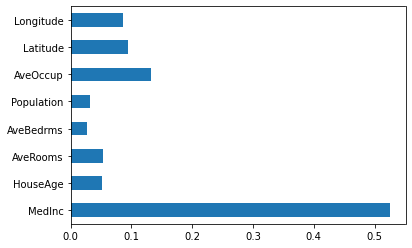

In [181]:
feat_importances = pd.Series(regr.feature_importances_, index=dataset.feature_names)
feat_importances.plot(kind='barh')

### Explainable Machine learning
- [Tree visualization](https://github.com/parrt/dtreeviz)
- [SHAP](https://github.com/slundberg/shap)
- [LIME](https://github.com/marcotcr/lime)

**LIME**: By following the tutorial, we try to explain the test data result<br>
https://marcotcr.github.io/lime/tutorials/Using%2Blime%2Bfor%2Bregression.html<br>
``!pip install lime``

In [18]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=dataset.feature_names, 
                                                   class_names=dataset.target_names, mode='regression')

In [19]:
pd.DataFrame(X_test[[4]],columns=dataset.feature_names)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.0049      25.0  4.319261   1.039578       649.0  1.712401     37.79   

   Longitude  
0    -122.43

In [22]:
exp = explainer.explain_instance(X_test[4], regr.predict, num_features=8)
exp

In [23]:
exp.show_in_notebook(show_table=True)

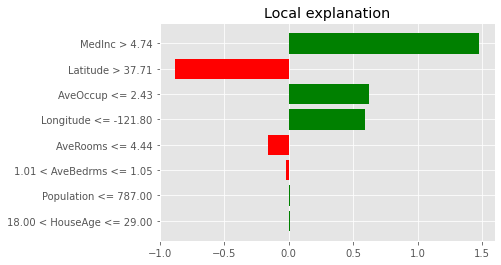

In [24]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()